In this file, I will organize the data and make it ready for modeling.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

load the data

In [2]:
df = pd.read_table("../data/training.txt",header=None)

In [4]:
df.columns = ["label","words"]

In [5]:
df.head()

,label,words
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


### Some rough EDA

In [6]:
df.shape

(6918, 2)

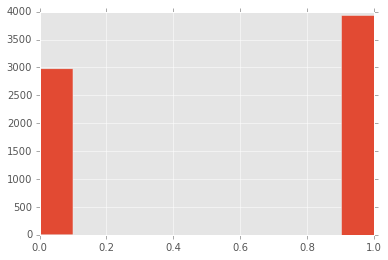

In [7]:
df["label"].hist()

In [8]:
df.label.value_counts()

1    3943
0    2975
Name: label, dtype: int64

In [9]:
df.label.value_counts()/df.shape[0]

1    0.569962
0    0.430038
Name: label, dtype: float64

** The proportions of positive and negative sentiment are about even. ** Now let's check the length of each sample。

(0, 500)

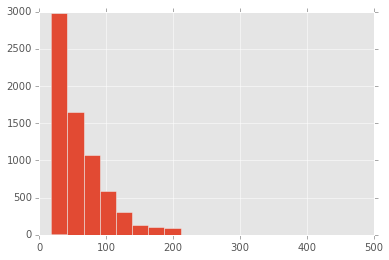

In [10]:
df['words'].apply(lambda x: len(x)).hist(bins = 200)
plt.xlim(0,500)

In [11]:
df['words'].apply(lambda x: len(x)).min(), df['words'].apply(lambda x: len(x)).max()

(18, 4849)

In [12]:
df['words'].apply(lambda x: len(x)).mean()

61.686036426712924

Add length as a new feature.

In [13]:
df["length"] = df['words'].apply(lambda x: len(x))

## Split training and testing

Before tokenizing and applying tf-idf to the words, we should split the data into trainning and testing sets. 

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
y = df.pop("label").values
X = df.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## Tokenize training set

In [21]:
from nltk import word_tokenize

In [52]:
words = X_train[:,0]

In [60]:
bag = np.array([word_tokenize(word) for word in words])

## Stemming and Lemmatization

In [61]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [75]:
stemer = PorterStemmer()

In [76]:
[stemer.stem('hate') #for i in bag[0]]

u'hate'

In [72]:
bag[0][1]

'hate'